## HR Analytics: Job Change of Data Scientists
### Predict who will move to a new job
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.


### Some information and limitation which detected in EDA and Cleaning Phase
### Limitation and Conclousion:
    - The data contains 19158 Rows and 14 columns includes Target variable. This is a reasonable size and will allow me to work in Jupyter notebooks
    - The most of features dtype is 'object', its mean we work with categorical data.
    - There are many features contains missing values.
    - we should to make some transformations on the features like 'relevant_exprience' to change values to 'yes', or 'no', and 'Experience', and company size.
    - The distribution of training hours seems to be skewed right.
    - There are systematic algorithms that we can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique
    - One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.
    - city_development index is highly correlated with target variable
- some information: Most of the people whome participate in our courses are 'male' and they have a 'relevant experience' in the field and they graduates or complete the master degree.
- STEM Students are more intersted in data science more than another discplines

## Feature Engineering Phase

#### important packages and get Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../2.clean_data/df_cleaned.csv')    
df.head()                                 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,unknown,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,unknown,Other,never,83,0.0
3,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
4,21651,city_176,0.764,Female,Has relevent experience,Part time course,Graduate,STEM,11,unknown,Other,1,24,1.0


In [3]:
df.isna().sum().sum()

0

### Encode the data for modeling phase

#### 1. One Hot Encoding [relevent_experience, gender, enrolled_university]

In [4]:
df = pd.get_dummies(df, columns =['relevent_experience', 'enrolled_university', 'gender'])
df.head(1)

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other
0,8949,city_103,0.92,Graduate,STEM,>20,unknown,Other,1,36,1.0,1,0,0,0,1,0,1,0


In [5]:
df = df.drop(['relevent_experience_No relevent experience', 'enrolled_university_Part time course', 'gender_Other'], axis=1)

#### 2. Label Encoding [city, education_level, major_discipline, experience, company_size,  company_type, last_new_job]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()
lis = ['education_level', 'major_discipline', 'company_size',  'company_type']
for col in lis:
    df[col] = encoder.fit_transform(df[col])

In [8]:
df.head()

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,relevent_experience_Has relevent experience,enrolled_university_Full time course,enrolled_university_no_enrollment,gender_Female,gender_Male
0,8949,city_103,0.920,0,5,>20,8,3,1,36,1.0,1,0,1,0,1
1,29725,city_40,0.776,0,5,15,4,5,>4,47,0.0,0,0,1,0,1
2,11561,city_21,0.624,0,5,5,8,3,never,83,0.0,0,1,0,1,0
3,666,city_162,0.767,2,5,>20,4,1,4,8,0.0,1,0,1,0,1
4,21651,city_176,0.764,0,5,11,8,3,1,24,1.0,1,0,0,1,0


#### Handle stractural Error

In [9]:
df['experience'] = df['experience'].replace('>20', 22)
df['experience'] = df['experience'].replace('<1', 0)

In [10]:
df['last_new_job'] = df['last_new_job'].replace('>4', 5)
df['last_new_job'] = df['last_new_job'].replace('never', 0)

In [11]:
import re 

In [12]:
def find_number(text):
    num = re.findall(r'\d+',text)
    return " ".join(num)
df['city']=df['city'].apply(lambda x: find_number(x))

#### #### Handle data types

In [13]:
for col in list(df.columns):
    if df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col])

### Drop unwanted Features

In [14]:
df = df.drop('enrollee_id', axis=1)

In [15]:
df.shape

(18014, 15)

### Extract useful Features

In [16]:
df["NEW1"] = df["major_discipline"] * df["education_level"]

In [17]:
df["NEW2"] = df["experience"] * df["education_level"]

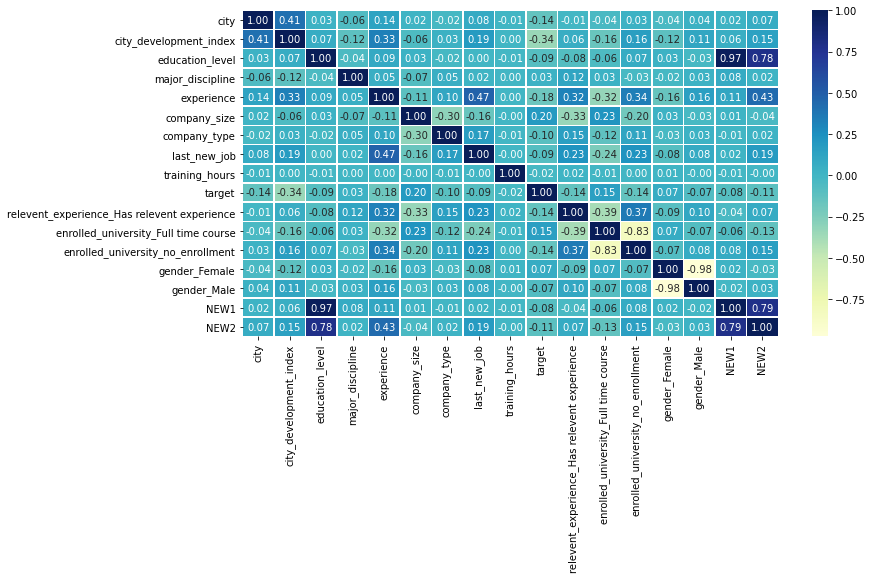

In [18]:
## Check for the correlations between variables
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, center=0, linewidths=.5, cmap="YlGnBu", fmt='.2f')
plt.show()

#### Standraization

In [19]:
df['training_hours'].std()

60.05921999090407

In [20]:
df['training_hours'] = np.log(df['training_hours'])

### ensampling

In [21]:
df.describe()

,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,relevent_experience_Has relevent experience,enrolled_university_Full time course,enrolled_university_no_enrollment,gender_Female,gender_Male,NEW1,NEW2
count,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,80.260242,0.831728,0.706395,4.583824,10.459087,4.518708,3.872988,2.026535,3.761903,0.245420,0.732208,0.195237,0.740979,0.281392,0.709004,3.194293,8.017986
std,46.226282,0.122115,1.001806,0.986866,7.045377,2.847453,1.384768,1.673468,0.986348,0.430348,0.442821,0.396394,0.438109,0.449691,0.454234,4.663982,14.627749
min,1.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.745000,0.000000,5.000000,5.000000,2.000000,3.000000,1.000000,3.135494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.910000,0.000000,5.000000,9.000000,4.000000,5.000000,1.000000,3.850148,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,103.000000,0.920000,2.000000,5.000000,16.000000,8.000000,5.000000,3.000000,4.477337,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,8.000000,10.000000
max,180.000000,0.949000,4.000000,5.000000,22.000000,8.000000,5.000000,5.000000,5.817111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,88.000000


In [22]:
df.to_csv('data_process.csv', index=False)

In [ ]:
بقخة 